In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

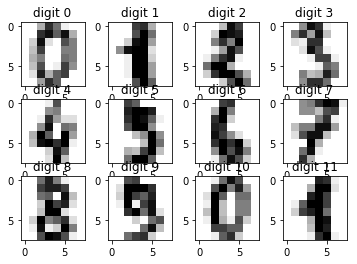

In [9]:
#显示前12张图片
plt.figure(1)
for i in range(12):
    imageplot=plt.subplot(3,4,i+1)
    plt.imshow(digits.images[i],cmap="binary",vmax=16,vmin=0)
    imageplot.set_title("digit %d"%i)


In [5]:
##导入数据集
###高维问题，本例子是利用前馈神经网络做数字分类
#数据集中有共有10种数字图片，数字分别是0-9
#每种类别的数字大概有180张图片，总共的图片数目为1797张
#每个样本都是一个8x8的图片，即64个像素点，像素的变化范围是0-16
digits=datasets.load_digits()
x,y=digits.data,digits.target
##将x归一化，均值为0，标准差为1
x=StandardScaler().fit_transform(x)
##将x还原为8x8的数组类型
x=x.reshape(1797,8,8)
##划分训练集测试集，测试集占比为30%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
##利用keras建立神经网络结构
model=tf.keras.models.Sequential([
    ##将数据‘铺平’即变为一维变量
    tf.keras.layers.Flatten(),
    ##定义隐藏层中512个神经元，激活函数为relu
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    ##保留率为1-0.2=0.8
    tf.keras.layers.Dropout(0.2),
    ##定义输出层为10个神经元，激活函数为softmax
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])
##优化算法为adam，损失函数为稀疏的多类对数损失，评价准则为准确率
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
##模型训练，训练轮次为5次
model.fit(x_train, y_train, epochs=5)
##模型评估，返回测试集预测的损失函数以及准确率
model.evaluate(x_test, y_test)

Epoch 1/5
1257/1257 [==============================] - 1s 589us/step - loss: 1.0336 - acc: 0.7653
Epoch 2/5
1257/1257 [==============================] - 0s 112us/step - loss: 0.2524 - acc: 0.9451
Epoch 3/5
1257/1257 [==============================] - 0s 107us/step - loss: 0.1425 - acc: 0.9745
Epoch 4/5
1257/1257 [==============================] - 0s 107us/step - loss: 0.0939 - acc: 0.9881
Epoch 5/5
540/540 [==============================] - 0s 310us/step


[0.11356374047420643, 0.9740740749571059]